In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import math

# CONFIDENCE INTERVALS

In [2]:
Allen = 98.25
std = 0.73
n = 130

In [3]:
sem = std/(n**0.5)
sem

0.06402523540941313

In [4]:
# z score or t score for %95
margin_of_error = 1.96*sem

In [5]:
ci_upper = Allen + margin_of_error
ci_upper

98.37548946140245

In [6]:
ci_lower = Allen - margin_of_error
ci_lower

98.12451053859755

In [7]:
# by scipy.stats

In [8]:
help(stats.norm.interval)

Help on method interval in module scipy.stats._distn_infrastructure:

interval(confidence=None, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Confidence interval with equal areas around the median.
    
    .. deprecated:: 1.9.0
       Parameter `alpha` is replaced by parameter `confidence` to avoid
       name collisions with the shape parameter `alpha` of some
       distributions. Parameter `alpha` will be removed in SciPy 1.11.0.
    
    Parameters
    ----------
    confidence : array_like of float
        Probability that an rv will be drawn from the returned range.
        Each value should be in the range [0, 1].
    arg1, arg2, ... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        location parameter, Default is 0.
    scale : array_like, optional
        scale parameter, Default is 1.
    
    Returns
    -------
    a, b :

In [9]:
ci_z = stats.norm.interval(0.95, Allen, sem)
ci_z

(98.12451284449585, 98.37548715550415)

In [10]:
ci_t = stats.t.interval(0.95,n-1, Allen, sem)
ci_t

(98.12332450367107, 98.37667549632893)

In [11]:
mean = 5.4
std = 3.1
n = 500

In [12]:
sem = std/(n**0.5)


In [13]:
sem

0.13863621460498696

In [14]:
margin_error = 1.96*sem
margin_error

0.27172698062577444

In [15]:
upper = mean + margin_error
upper

5.671726980625775

In [16]:
lower = mean - margin_error
lower

5.128273019374226

In [17]:
# by scipy.stats

In [18]:
ci_z = stats.norm.interval(0.95, mean, sem)
ci_z

(5.12827801242126, 5.67172198757874)

In [19]:
ci_t = stats.t.interval(0.95, n-1, mean, sem)
ci_t

(5.127617354510309, 5.672382645489692)

# HYPOTHESIS TESTING

In [20]:
def hypo_result(p_value, alpha ):
    if p_value<alpha:
        print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
    else:
        print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

In [44]:
mu = 13.20
sigma = 2.50
n = 40 
x_bar = 12.20
a = 0.01

In [45]:
SE = sigma / math.sqrt(n)

In [46]:
z = (x_bar - mu)/SE 
z

-2.5298221281347035

In [49]:
p_value = 1- stats.norm.cdf(z)
p_value

0.9942939818069991

In [50]:
hypo_result(p_value, a)

At 0.01 level of significance, we fail to reject the null hypothesis.


In [26]:
# bt scipy.stats

In [56]:
df = pd.read_csv("soil - Sheet1.csv")
df

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371
5,1.641,1.428
6,1.499,1.119
7,1.347,1.373
8,1.685,1.589
9,1.578,1.714


In [58]:
stats.levene(df["Soil1"][:30], df.Soil2)

LeveneResult(statistic=0.31486292982090475, pvalue=0.5767018253541134)

In [61]:
result = stats.ttest_ind(df["Soil1"][:30], df.Soil2, equal_var=True)
result

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.59322873235282e-06)

In [62]:
hypo_result(result.pvalue, 0.01)

At 0.01 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


In [66]:
df = pd.read_csv("2015 PISA Test - Sheet1.csv")

In [32]:
df.dropna(inplace=True)

In [67]:
df

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


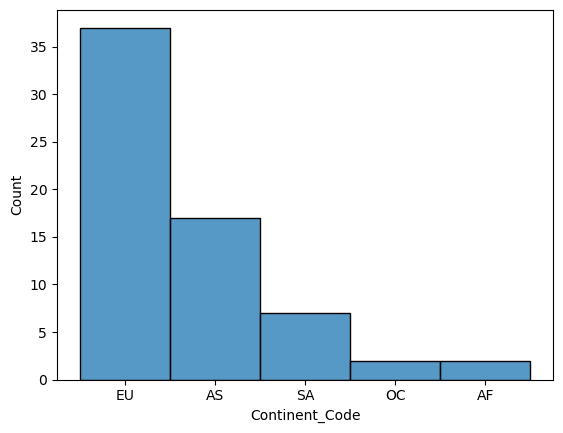

In [80]:
sns.histplot(data = df, x = "Continent_Code");

In [33]:
df.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', 'AF'], dtype=object)

In [30]:
df.groupby("Continent_Code")["Math"].describe().T

Continent_Code,AF,AS,EU,OC,SA
count,2.000000,17.000000,37.000000,2.000000,7.000000
mean,363.212100,466.216647,477.981449,494.559750,402.887700
std,5.099513,64.356490,35.150403,0.938401,18.128894
min,359.606200,380.259000,371.311400,493.896200,377.069500
25%,361.409150,403.833200,464.040100,494.227975,388.102200
50%,363.212100,459.816000,489.728700,494.559750,409.033300
75%,365.015050,531.296100,503.722000,494.891525,417.617650
max,366.818000,564.189700,521.250600,495.223300,422.671400


In [68]:
df_AS = df[df["Continent_Code"] == "AS"]
df_EU = df[df["Continent_Code"] == "EU"]

In [69]:
stats.levene(df_AS.Math, df_EU.Math)

LeveneResult(statistic=14.300030628780675, pvalue=0.0004037413184451081)

In [77]:
result = stats.ttest_ind(df_EU.Math, df_AS.Math, equal_var=True)
result

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

In [33]:
df.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', 'AF'], dtype=object)

In [78]:
hypo_result(result.pvalue, 0.05)

At 0.05 level of significance, we fail to reject the null hypothesis.


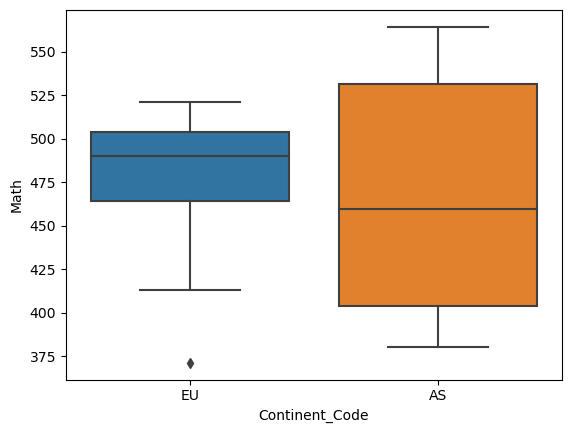

In [73]:
import seaborn as sns
sns.boxplot( data = df_x, x = "Continent_Code", y = "Math" );